*ADS-A topics: Support Vector Machines, Face Recognition, Working with images, Cross validation libraries, Sklearn.metrics*

*Author: Gerard Schouten (2017), Merel Veracx (2018)*

# Face Recognition with Support Vector Machines

In this partly finished notebook, the Support Vector Machine algorithm is used to recognize faces. We will use the Olivetti faces dataset, as included in Scikit-Learn library. More info at: http://scikit-learn.org/stable/datasets/olivetti_faces.html

We start by importing numpy, scikit-learn, and matplotlib, the Python libraries we will be using for this analysis. 

First, we show the versions of these libraries (that is always wise to do in case you have to report problems running the notebooks!) and use the inline plotting mode statement.

In [1]:
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

print('scikit-learn version:', sk.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

scikit-learn version: 0.24.1
numpy version: 1.19.2
matplotlib version: 3.3.2


## 1 - Load Olivetti Face Dataset

#### DIY
Write the code to import the olivetti faces dataset. Load them into the variable faces. Make sure to use the correct library from sklearn.datasets. Check if the dataset has been loaded correctly by inspecting the description.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

## 2 - Investigate the Olivetti Face Dataset

As you can see by running the following statement, the result of fetch_olivetti_faces(), as stored in the variable `faces`, is a dictionary with the following keys: `faces.target`, `faces.images`, `DESCR`, `data`.

In [3]:
print(faces.keys())

print("Target shape: ", faces.target.shape)
print("There are {} unique targets in the dataset".format(len(np.unique(faces.target))))
print(faces.target)

print("Images: ", faces.images.shape)
print("Data: ", faces.data.shape)


dict_keys(['data', 'images', 'target', 'DESCR'])
Target shape:  (400,)
There are 40 unique targets in the dataset
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 

#### DIY What conclusions can you draw from this information? 

* How many images are present in the dataset? 
    
    - ***400 images***
    
* What is the image size in terms of pixels? 
    
    - ***64px x 64px***
    
* How many persons are there? 
    - ***40 persons***

#### DIY How can we inspect that the data is already normalized? Is scaling still necesarry?

Original X shape: (400, 64, 64)
Reshaped X shape: (400, 4096)
y shape (400,)
The length of X: 400


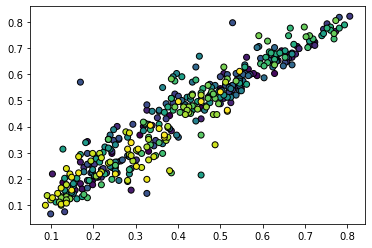

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

X = faces.images
y = faces.target

print("Original X shape:", X.shape)
X = X.reshape((400, 4096))
print("Reshaped X shape:", X.shape)
print("y shape", y.shape)

# Normalize
scaler_iris = StandardScaler().fit(X)
X_iris = scaler_iris.transform(X)
print('The length of X: {}'.format(len(X)))

plt.scatter(X[:,0], X[:,1], edgecolors='k', c=y)


We don't have to scale attributes, because data is already normalized

#### DIY Plot the first 20 images in a row. 

Hint: Make a figure with 20 subplots of 20px on 20px. You can use p.fig.add_subplot and p.imshow(images[i]) to add an image and p.text to add the index of the image and the label. You can find code examples online [Ex](http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html).

In [5]:
n_row, n_col = 1, 20
n_components = n_row * n_col
image_shape = (64, 64)

dataset = faces.data
n_samples, n_features = dataset.shape

# global centering
faces_centered = dataset - dataset.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 3.8 * n_row))
    plt.suptitle(title, size=50)
    
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Dataset consists of 400 faces


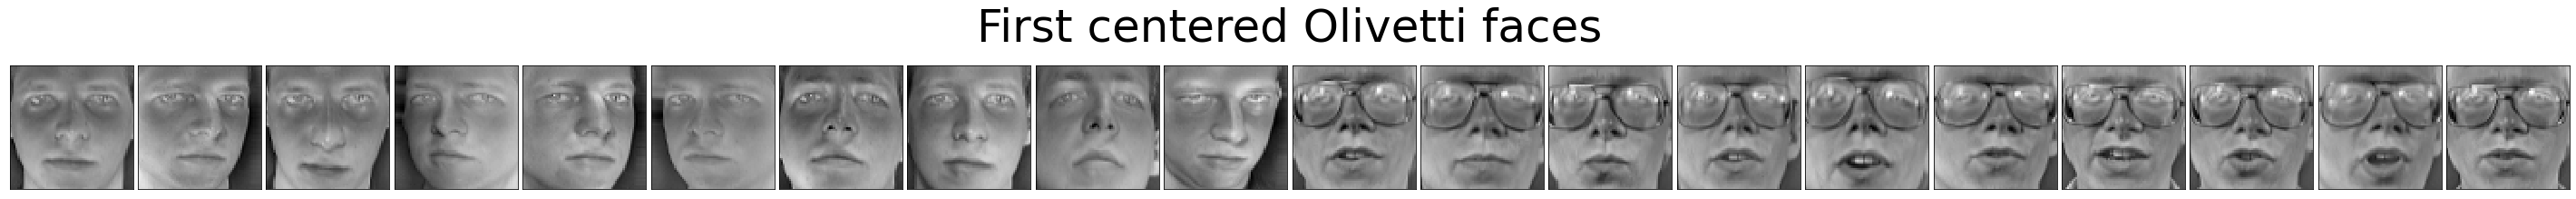

In [6]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

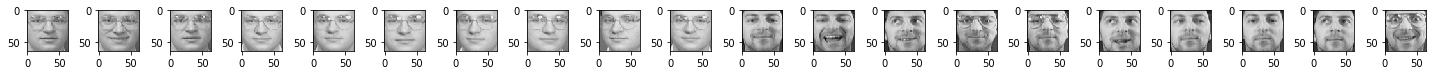

In [7]:
from skimage.io import imshow

# ploting the first 20 images
image_count = 20

plt.figure(figsize=(20,20))
for i in range(image_count):
    plt.subplot(1,image_count,i+1)
    x=faces.images[i + 50] # 5th subject
    imshow(x)
plt.show()

#### DIY Plot the first 20 images in a row. 
Change your code above into a function print_faces(faces.images, faces.target, numberOfImages).

Use this function to plot all the faces in a matrix of 20x20.

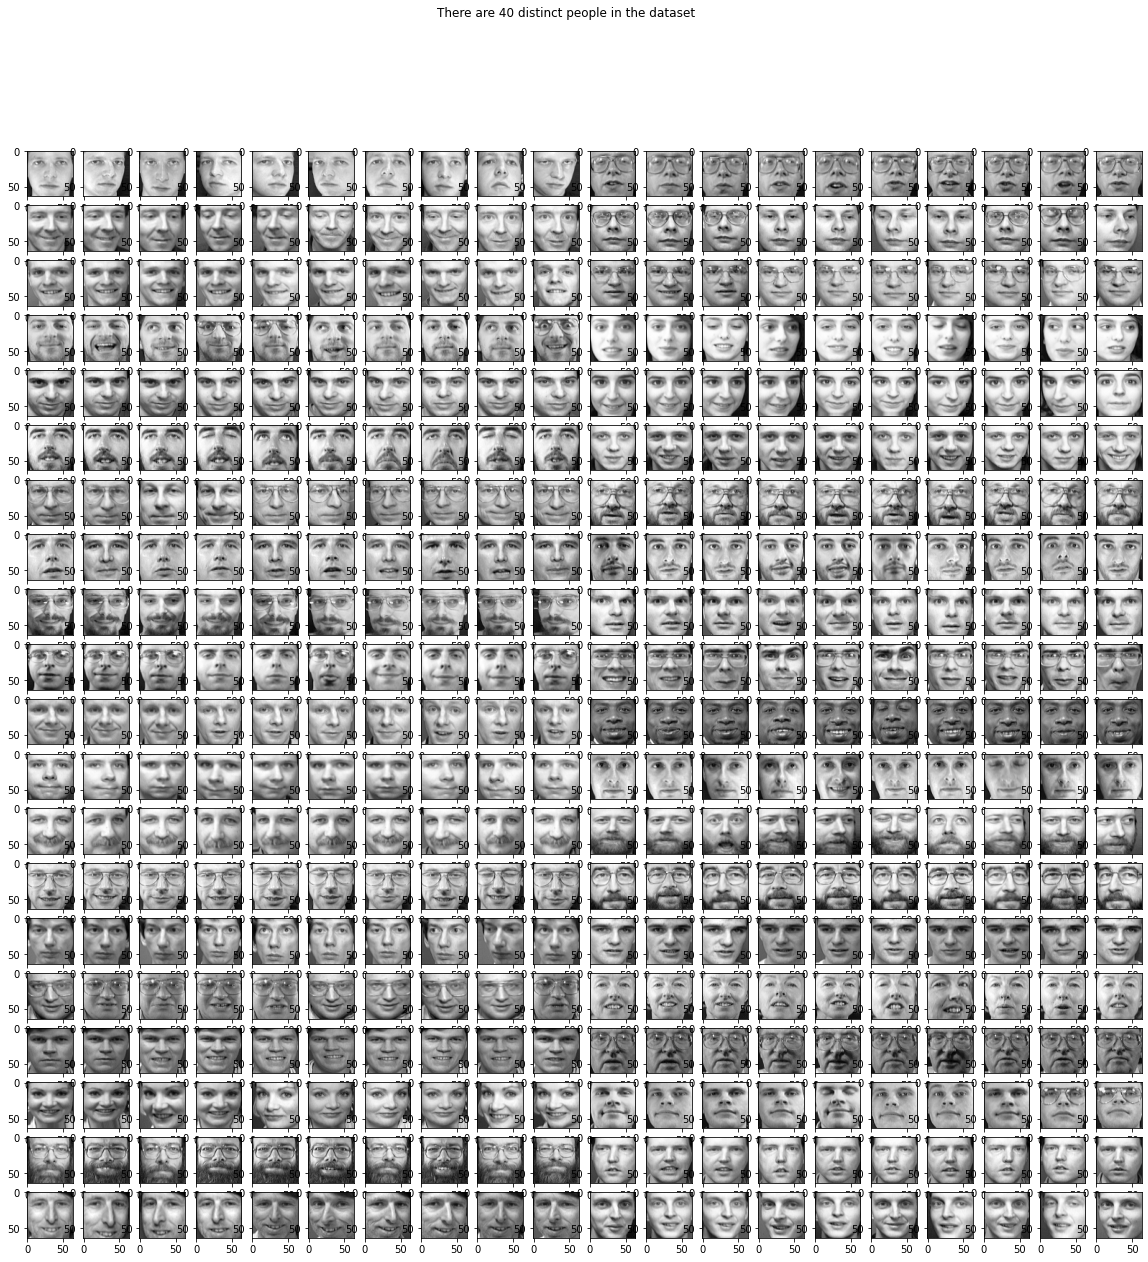

In [8]:
def print_faces(images, target, number_images):
    
    labels = len(np.unique(faces.target)) 
    rows =  labels - 20
    
    fig, axarr=plt.subplots(nrows= rows, ncols=number_images,figsize=(20,20))
    
    axarr=axarr.flatten()
    
    for i in range(0, number_images * rows):
        
        img = images[i,:,:]
        axarr[i].imshow(img, cmap='gray')

    
    
    plt.suptitle("There are 40 distinct people in the dataset")
    

print_faces(faces.images, faces.target, 20)

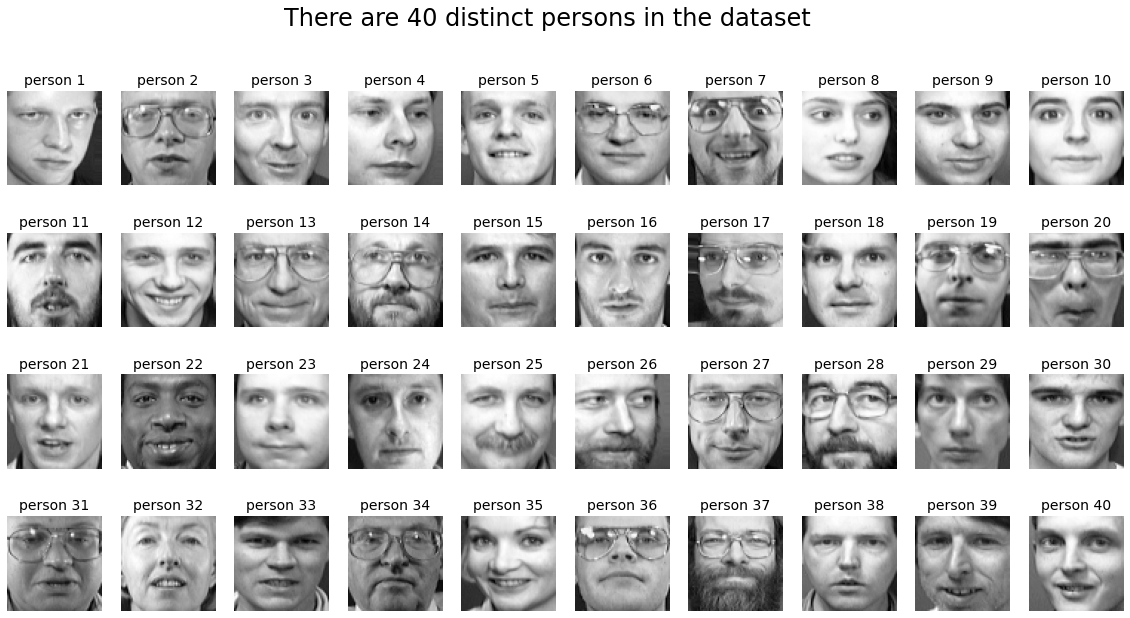

In [9]:
# All unique faces in the sample
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = faces.images[(10 * i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()


As you can see now we have confirmed that there are 40 individuals with 10 different images each in the dataset.

## 3 - Analysis with SVM

We will build a classifier whose model is a hyperplane that separates instances of one class from the rest. Support Vector Machines (SVM) are supervised learning methods that try to obtain these hyperplanes in an optimal way, by selecting the ones that pass through the widest possible gaps between instances of different classes. New instances will be classified as belonging to a certain category based on which side of the surfaces they fall on. 

#### DIY Identify the classes, features, training data and test data. 
As in the Google Car example from class, try to make a visualisation of the different items in this machine learning algorithm.

#### Guide: possible answer

* classes: the 40 individuals
* features: the grey value of 20 x 20 pixels, so there are 400 features for each datapoint
* training data: several pictures of each of the 40 individuals
* test data: minimally one picture of each of the 40 individuals

#### DIY create a SVC linear kernel in the variable svc_1

In [10]:
# Converting the image data from matrix to a vector
y = faces.target
print(faces.images.shape)

# reshaping the images 
X = faces.images.reshape((400, 4096))
print("X shape:",X.shape)
print("y shape:",y.shape)

(400, 64, 64)
X shape: (400, 4096)
y shape: (400,)


In [11]:
svc_1 = SVC(kernel = 'linear', C=1, random_state=42)

#### DIY Build training and testing sets

Keep the images you think the algorithm will have the most problem with in the test set.

In [12]:
# Split data for train and test purposes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (280, 4096)
x_test:  (120, 4096)
y_train:  (280,)
y_test:  (120,)


#### DIY Train your classifier and evaluate it with the test data

Use sklearn.metrics to inspect the accuracy of the test set.

In [13]:
from sklearn.metrics import confusion_matrix

svc_1.fit(X_train, y_train)
svc_1_accuracy = round(svc_1.score(X_test,y_test)*100,2)


y_pred = svc_1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("SVM_accuracy is %",svc_1_accuracy)

confusion matrix:
[[3 0 0 ... 0 0 1]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 3]]
SVM_accuracy is % 95.83


#### DIY Inspect the wrong classifications

* How does the classifier perform on your perceived hard images? 
* What is the image that he misclassifies? Why?

### Cross-validation

As learned in class, when training the model en tuning its hyperparameters, overfitting on the training data is possible.

#### DIY Perform 5-fold cross-validation. 
Show what all the accuracy scores are and compute the average value.

In [14]:
from sklearn import svm

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)

scores = cross_val_score(clf, X, y, cv=7)
print(scores) 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[1.         0.94736842 0.98245614 0.96491228 0.98245614 0.94736842
 0.94736842]
0.97 accuracy with a standard deviation of 0.02


#### DIY Write down your conclusion of the K-fold cross validation.
Can you find which images where wrongly misclassified in the worst run?

In [15]:
# It splits the data to smaller chunks, 7 folds in my case. When uses the end 57 - 114 images to train the model the performes is the worst.


### StratifiedKFold

The function ``StratifiedKFold`` is a variation of k-fold which returns stratified folds: Each set contains approximately the same percentage of samples of each target class as the complete set.

The example below illustates this. There are 2 classes, and the StratifiedKFold creates 3 train and test sets, each containing the indexes of the elements selected.

In [16]:
from sklearn.model_selection import StratifiedKFold

labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(3)

for train, test in skf.split(labels, labels):
     print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


#### DIY Apply StratifiedKFold on the Facial Recognition with SVM

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)

print(skf)

for train_index, test_index in skf.split(X, y):
    
    print("\nTRAIN:\n", train_index, "\n\nTEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

TRAIN:
 [  4   5   6   7   8   9  13  14  15  16  17  18  19  23  24  25  26  27
  28  29  34  35  36  37  38  39  43  44  45  46  47  48  49  53  54  55
  56  57  58  59  64  65  66  67  68  69  73  74  75  76  77  78  79  83
  84  85  86  87  88  89  94  95  96  97  98  99 103 104 105 106 107 108
 109 113 114 115 116 117 118 119 124 125 126 127 128 129 133 134 135 136
 137 138 139 143 144 145 146 147 148 149 154 155 156 157 158 159 163 164
 165 166 167 168 169 173 174 175 176 177 178 179 184 185 186 187 188 189
 193 194 195 196 197 198 199 203 204 205 206 207 208 209 214 215 216 217
 218 219 223 224 225 226 227 228 229 233 234 235 236 237 238 239 244 245
 246 247 248 249 253 254 255 256 257 258 259 263 264 265 266 267 268 269
 274 275 276 277 278 279 283 284 285 286 287 288 289 293 294 295 296 297
 298 299 304 305 306 307 308 309 313 314 315 316 317 318 319 323 324 325
 326 327 328 329 334 335 336 337 338 339 343 344 345 

### LeaveOneOut
The function ``LeaveOneOut`` (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set.

The code example below illustrates this:

In [18]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

Potential users of LOO for model selection should weigh a few known caveats. When compared with k-fold cross validation, one builds n models from n samples instead of k models. Moreover, LOO is trained on n-1 samples rather than (k-1)/k * n. Hence LOO is computationally more expensive than k-fold cross validation.


In terms of accuracy, LOO often results in high variance as an estimator for the test error. Intuitively, since n-1 of the n samples are used to build each model, models constructed from folds are virtually identical to each other and to the model built from the entire training set.
However, if the learning curve is steep for the training size in question, then 5- or 10- fold cross validation can overestimate the generalization error.

As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO.

#### DIY Apply LeaveOnOut on the Facial Recognition with SVM

In [19]:
import numpy as np
from sklearn.model_selection import LeaveOneOut


loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

LeaveOneOut()
[[0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 [0.1983471  0.19421488 0.19421488 ... 0.75206614 0.75206614 0.73966944]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] [[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]] [ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4
  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12
 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14
 14 14 14 14 14 15 15 15 15 15

 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39] [12]
[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] [[0.5        0.5371901  0.5289256  ... 0.5206612  0.59917355 0.38429752]] [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 1

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] [[0.6322314  0.6528926  0.58264464 ... 0.08264463 0.09090909 0.09090909]] [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 14 14 14 14 14
 14 14 14 14 14 15 15 15 15 15 15 15 15 15 1

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] [[0.60330576 0.58677685 0.5413223  ... 0.5289256  0.49586776 0.49586776]] [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 15 15 15 15 15 15 15 15 15 1

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] [[0.6280992  0.6570248  0.6487603  ... 0.23140496 0.18595041 0.18181819]] [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 1

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] [[0.61157024 0.6446281  0.6570248  ... 0.17768595 0.2107438  0.2231405 ]] [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 1

## 4 - Optionally: Other Metrics

We import the sklearn ``metrics`` package and determine also precision and recall for the test set, for _each class_. 

#### DIY The code is given ... can you figure out what happens?

In [20]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [21]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
1.0
Classification Report:
              precision    recall  f1-score   support

          39       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


#### DIY What is your overall conclusion? Can you explain the confusion matrix?

In [22]:
#Conclusion: Performance of SVM for face recognition is incredibly high!
#Confusion matrix: Excellent tool to find problemetic data (which face goes wrong).

## 5 - Discriminate People with or without Glasses

Now, another problem. 

Try to classify images of people with and without glasses. A few tips to take into account.
- Use the indexes below to relabel all the images
- Create a training & test set for this new problem
- Again try a [linear SVC classifier](http://en.wikipedia.org/wiki/Kernel_%28linear_algebra%29) (start by using the default parameters)
- Do the analysis and evaluate.
- And  show a classification report as above.
- Which images go wrong?

In [23]:
# Index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

#### DIY Create a new target based on the indexes above.

Use that target to create a train and test set.

In [24]:

target_images = np.zeros(faces.target.shape[0])
for (start, end) in glasses:
    target_images[start:end + 1] = 1
        
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_images, test_size=0.33, random_state=42)

#### DIY Train your SVM and validate

Which test pictures are misclassified?

In [25]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

print("Accuracy train data: ", svc.score(X_train, y_train))

print("Accuracy test data: ", svc.score(X_test, y_test))

prediction = svc.predict(X_test)
# It will print a classification report
print(metrics.classification_report(y_test, prediction))

# Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))



Accuracy train data:  1.0
Accuracy test data:  0.9696969696969697
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        99
         1.0       0.89      1.00      0.94        33

    accuracy                           0.97       132
   macro avg       0.95      0.98      0.96       132
weighted avg       0.97      0.97      0.97       132

[[95  4]
 [ 0 33]]


In [26]:
## Your answers ...

### DIY Learn glassed from one individual, test with all data

Now, let's train with only 10 images: all from the same person, sometimes with glasses and sometimes without glasses. With this we'll try to discard that it's remembering faces, instead of features related with glasses. We'll separate the subject with indexes from 30 to 39. We'll train and evaluate in the rest of the 390 instances. After that, we'll evaluate again over the separated 10 instances.


In [27]:
X_test = faces.data[30:40]
y_test = target_images[30:40]

In [28]:
print(y_test.shape[0])

select = np.ones(target_images.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_images[select == 1]

print(y_train.shape[0])

10
390


In [29]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

print("Accuracy train data: ", svc.score(X_train, y_train))

print("Accuracy test data: ", svc.score(X_test, y_test))

prediction = svc.predict(X_test)
# It will print a classification report
print(metrics.classification_report(y_test, prediction))

# Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))


Accuracy train data:  1.0
Accuracy test data:  0.9
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

[[5 0]
 [1 4]]


Show the evaluation faces, and their predicted category. Face number eight is incorrectly classified as no-glasses (probably because his eyes are closed!).

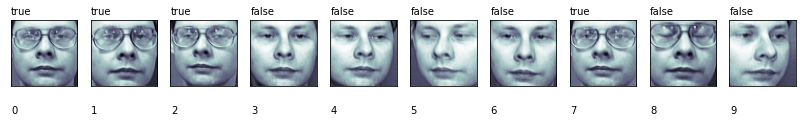

In [30]:
images = [np.reshape(a, (64, 64)) for a in X_test]

fig = plt.figure(figsize=(22, 22))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.15)

for i in range(10):
    p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    p.imshow(images[i], cmap=plt.cm.bone)

    # labeling the images with the target values
    p.text(0, -5, "true" if str(prediction[i]) == "1.0" else "false")
    p.text(0, 90, str(i))